<a href="https://colab.research.google.com/github/yigiterenpeker/deneme/blob/main/IE_423Task10_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/continuous dataset.csv')
train = pd.read_excel('/content/drive/MyDrive/train_dataframes.xlsx')
test = pd.read_excel('/content/drive/MyDrive/test_dataframes.xlsx')

In [ ]:
df.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [ ]:
df.shape

(48048, 16)

In [ ]:
df.isnull().sum()


datetime      0
nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index(['datetime'], inplace=True)

In [ ]:
# Resample the data to ensure an hourly frequency
df = df.resample('H').sum()  #

# set the freq of index column
df.index.freq = 'H'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import numpy as np
from datetime import datetime, timedelta
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols



In [ ]:
df.select_dtypes(include='number').columns

Index(['nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc', 'T2M_san',
       'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav', 'TQL_dav',
       'W2M_dav', 'Holiday_ID', 'holiday', 'school'],
      dtype='object')

In [ ]:
num_columns = ['nat_demand', 'T2M_toc', 'TQL_toc', 'W2M_toc', 'T2M_san',
       'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav', 'TQL_dav',
       'W2M_dav', 'Holiday_ID', 'holiday', 'school']

# Convert each column to numeric
for columns in num_columns:
    df[columns] = pd.to_numeric(df[columns])

In [ ]:
df.head()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


Text(0, 0.5, 'Demand')

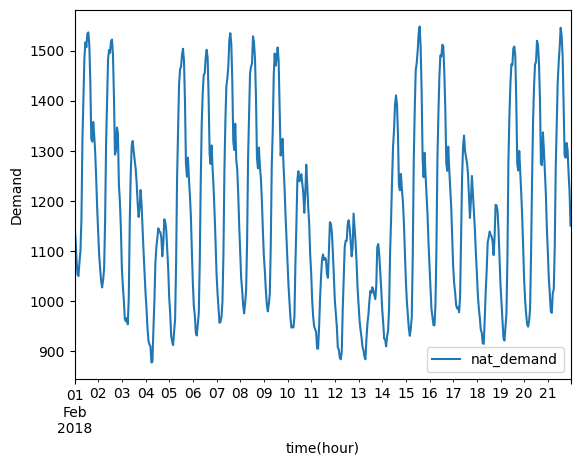

In [ ]:
df[['nat_demand']]['2018-02-01':'2018-02-21'].plot()

plt.xlabel('time(hour)')
plt.ylabel('Demand')

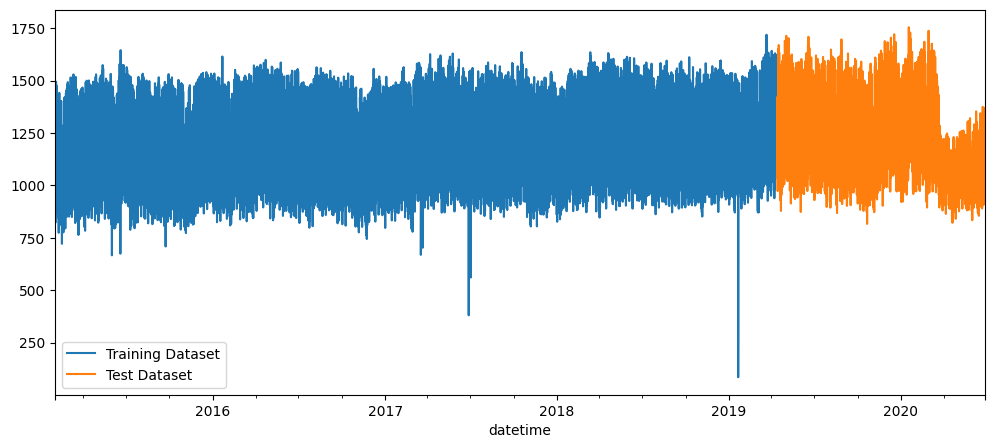

In [ ]:
df.index = pd.to_datetime(df.index)

train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

train_mask = (df.index >= train['datetime'].min()) & (df.index <= train['datetime'].max())
test_mask = (df.index >= test['datetime'].min()) & (df.index <= df.index.max())

df.loc[train_mask, 'nat_demand'].plot(figsize=(12,5), legend=True)
df.loc[test_mask, 'nat_demand'].plot(figsize=(12,5), legend=True)
plt.legend(['Training Dataset', 'Test Dataset'])
plt.show()

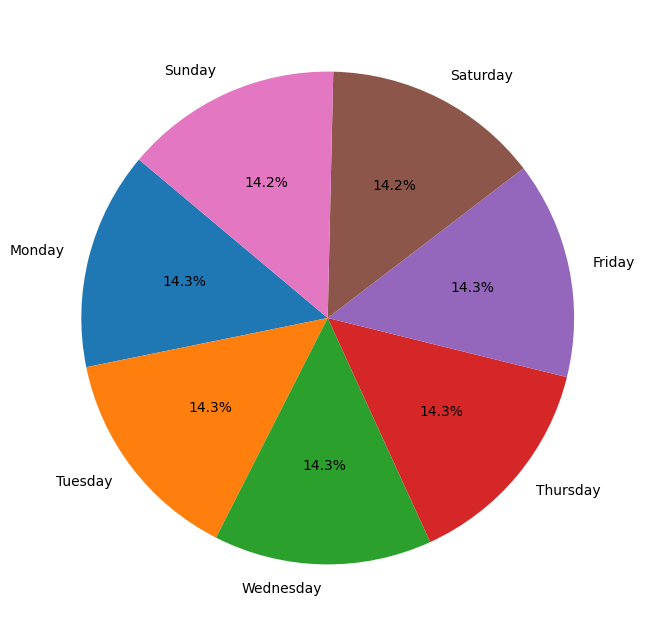

In [ ]:
day_counts = train['dayOfWeek'].value_counts().sort_index()
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create the pie chart
plt.figure(figsize=(15, 8))
plt.pie(day_counts, labels=[labels[i] for i in day_counts.index], autopct='%1.1f%%', startangle=140)
plt.show()


Text(0, 0.5, 'Wind Speed')

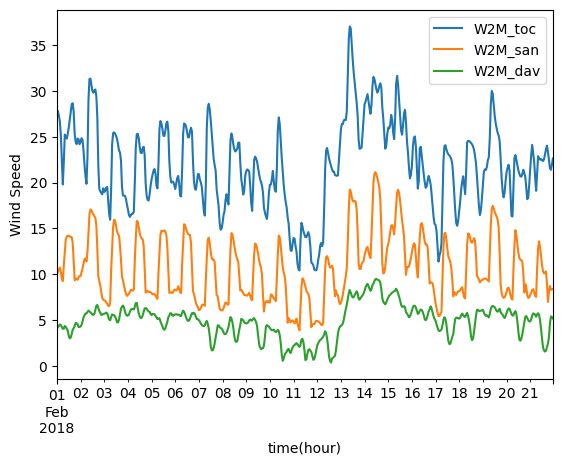

In [ ]:
df[['W2M_toc', 'W2M_san','W2M_dav']]['2018-02-01':'2018-02-21'].plot()
plt.xlabel('time(hour)')
plt.ylabel('Wind Speed')

# **Model Part**

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())          # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
adf_test(df['nat_demand'])


Augmented Dickey-Fuller Test: 
ADF test statistic        -20.961750
p-value                     0.000000
# lags used                57.000000
# observations          47990.000000
critical value (1%)        -3.430486
critical value (5%)        -2.861600
critical value (10%)       -2.566802
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
# Printing the maximum timestamp in the dataset
print(df.index.max())

# Printing the minimum timestamp in the dataset
print(df.index.min())

2020-06-27 00:00:00
2015-01-03 01:00:00


In [ ]:
dev_date_str = '2017-12-31'
# Convert dev_date_str to a datetime object
dev_date = datetime.strptime(dev_date_str, '%Y-%m-%d')
dev_date = pd.Timestamp(dev_date, tz='UTC')
df.index = df.index.tz_localize('UTC')
train_data = df[:dev_date]
test_data = df[dev_date:]

# **Exponential Smoothing**

In [ ]:
fitted_model = ExponentialSmoothing(train_data['nat_demand'],
                                    trend='add',
                                    seasonal='add',
                                    seasonal_periods=24).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
# Set the number of days for which the prediction is to be made
number_of_days = 30

# Calculate the total number of hours to predict based on the number of days
number_of_hours_to_predict = number_of_days * 24

# Calculate the end date for the prediction by adding the total hours to the development date (dev_date)
end_date = dev_date + timedelta(hours=number_of_hours_to_predict - 1)

# Extract the actual Gross Consumption data from the test dataset for the specified period
y = test_data['nat_demand'][dev_date:end_date]

# Use the fitted model to forecast the values for the specified number of hours and rename the output series to 'HW_Forecast'
test_predictions = fitted_model.forecast(number_of_hours_to_predict).rename('HW_Forecast')

In [ ]:
# Check if dev_date is in the index
if dev_date not in df.index:
    print("Warning: dev_date not found in DataFrame index. Adjust dev_date or check your DataFrame.")

# Splitting the data into training and testing sets
train_data = df.loc[:dev_date]  # Use .loc for more precise slicing
test_data = df.loc[dev_date:]

# Print the shapes of the resulting DataFrames to check if they are empty
print("Shape of train_data:", train_data.shape)
print("Shape of test_data:", test_data.shape)

Shape of train_data: (26232, 16)
Shape of test_data: (21817, 16)


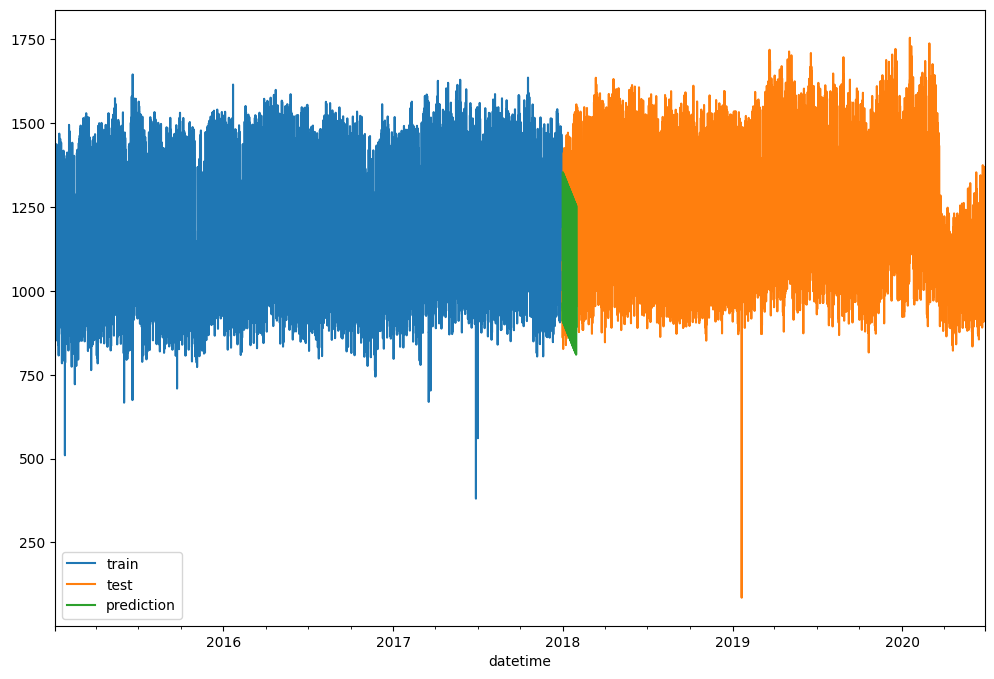

In [ ]:
# Plotting the Gross Consumption from the training data
train_data['nat_demand'].plot(legend=True, label='train')

# Plotting the Gross Consumption from the test data
test_data['nat_demand'].plot(legend=True, label='test', figsize=(12,8))

# Plotting the predicted Gross Consumption values
test_predictions.plot(legend=True, label='prediction');

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, test_predictions)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, test_predictions)
import numpy as np
rmse = np.sqrt(mse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 115.30284324830082
Mean Squared Error: 20613.780143846427
Root Mean Squared Error: 143.57499832438245


# **Autoregression **

In [ ]:
from statsmodels.tsa.ar_model import AutoReg,ARResults
model = AutoReg(train_data['nat_demand'], lags=1)
ARfit = model.fit()
ARfit.params
start=len(train_data['nat_demand'])
end=len(train_data['nat_demand'])+len(test_data['nat_demand'])-1
predictions1 = ARfit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

<Axes: xlabel='datetime'>

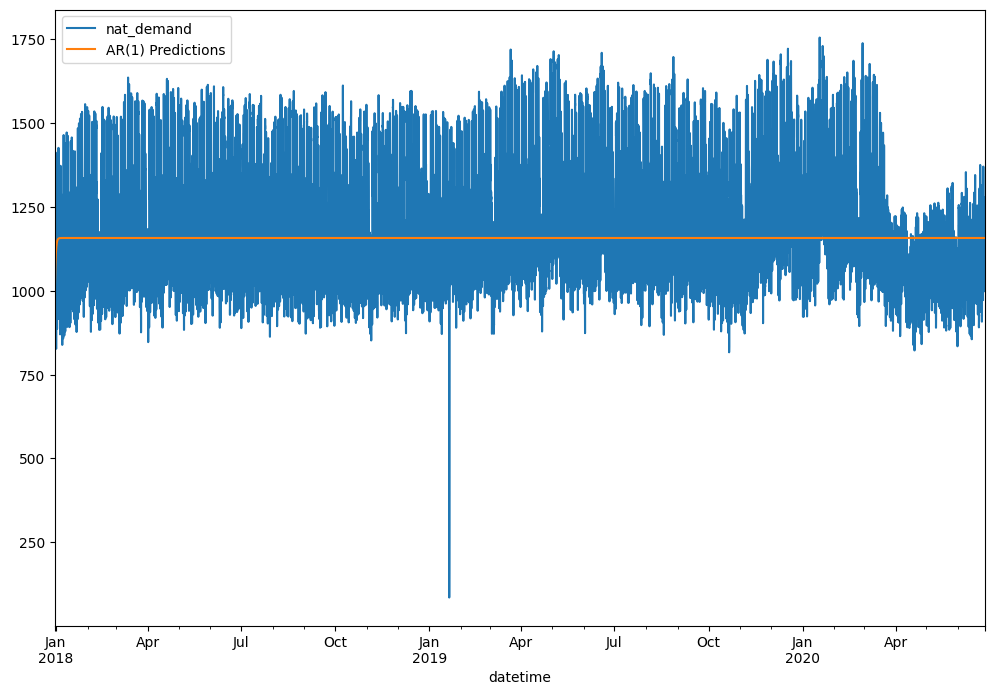

In [ ]:
test_data['nat_demand'].plot(figsize=(12, 8), legend=True)
predictions1.plot(figsize=(12, 8), legend=True)

In [ ]:
mae = mean_absolute_error(test_data['nat_demand'], predictions1)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(test_data['nat_demand'], predictions1)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 159.92319572435957
Mean Squared Error: 38211.641427252376
Root Mean Squared Error: 195.47798195002008


# **ARIMA **

In [ ]:
# Importing the `auto_arima` function from `pmdarima` library
!pip install pmdarima
from pmdarima import auto_arima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.7 MB/s eta 0:00:00


In [ ]:
# Using auto_arima to automatically select the best ARIMA model for 'GrossCon' time series data

# Data input: 'GrossCon' time series data (first 1000 data points)
stepwise_fit = auto_arima(df['nat_demand'][:500],

                          start_p=0,  # Autoregressive order (p)
                          start_q=0,  # Moving average order (q)

                          max_p=3,  # Maximum autoregressive order (p)
                          max_q=3,  # Maximum moving average order (q)

                          m=24,  # Number of time steps in a seasonal cycle

                          seasonal=True,

                          d=None,

                          trace=True,

                          error_action='ignore',

                          suppress_warnings=True,

                          stepwise=True)


stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[24] intercept   : AIC=6259.356, Time=4.15 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=6621.700, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=inf, Time=10.97 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=5797.247, Time=2.75 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=8434.955, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[24] intercept   : AIC=6005.168, Time=0.40 sec
 ARIMA(0,0,1)(1,0,1)[24] intercept   : AIC=5797.939, Time=4.42 sec
 ARIMA(0,0,1)(0,0,2)[24] intercept   : AIC=5675.693, Time=24.57 sec
 ARIMA(0,0,1)(1,0,2)[24] intercept   : AIC=5679.311, Time=28.52 sec
 ARIMA(0,0,0)(0,0,2)[24] intercept   : AIC=6242.280, Time=17.75 sec
 ARIMA(1,0,1)(0,0,2)[24] intercept   : AIC=4911.569, Time=19.46 sec
 ARIMA(1,0,1)(0,0,1)[24] intercept   : AIC=5009.431, Time=4.06 sec
 ARIMA(1,0,1)(1,0,2)[24] intercept   : AIC=4726.761, Time=26.75 sec
 ARIMA(1,0,1)(1,0,1)[24] intercept   : AIC=4699.180, Time=6.84 sec
 ARIMA(1,0,1)(1,0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  500
Model:             SARIMAX(1, 0, 2)x(1, 0, [1], 24)   Log Likelihood               -2335.539
Date:                              Wed, 07 Aug 2024   AIC                           4685.079
Time:                                      07:04:18   BIC                           4714.581
Sample:                                  01-03-2015   HQIC                          4696.655
                                       - 01-23-2015                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.5657      1.939      3.386      0.001       2.765      10.367
ar.L1          0.8892      0.017     51.905      0.000       0.856       0.923
ma.L1          0.4751      0.038     12.659      0.000       0.402       0.549
ma.L2          0.2485      0.042      5.928      0.000       0.166       0.331
ar.S.L24       0.9441      0.012     76.680      0.000       0.920       0.968
ma.S.L24      -0.6480      0.039    -16.732      0.000      -0.724      -0.572
sigma2       599.8471     29.054     20.646      0.000     542.902     656.792
===================================================================================
Ljung-Box (L1) (Q):                   2.17   Jarque-Bera (JB):                95.68
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                             0.19
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='datetime'>

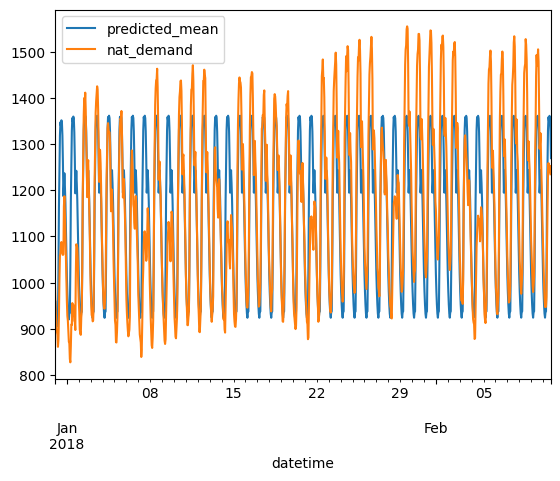

In [ ]:
# Import the necessary library
import statsmodels.api as sm

# Create the ARIMA model with the selected parameters
model = sm.tsa.ARIMA(train_data['nat_demand'], order=(1, 0, 2), seasonal_order=(1, 0, 1, 24), enforce_stationarity=False)

# Fit the ARIMA model to the data
model_fit = model.fit()
# Make future predictions
forecasted_values = model_fit.forecast(1000)
forecasted_values.plot(legend=True)
test_data['nat_demand'][:1000].plot(legend=True)

In [ ]:
mae = mean_absolute_error(test_data['nat_demand'][:1000], forecasted_values)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(test_data['nat_demand'][:1000], forecasted_values)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 90.3897031015571
Mean Squared Error: 14278.849445690588
Root Mean Squared Error: 119.49413979643766


# **SARIMA**

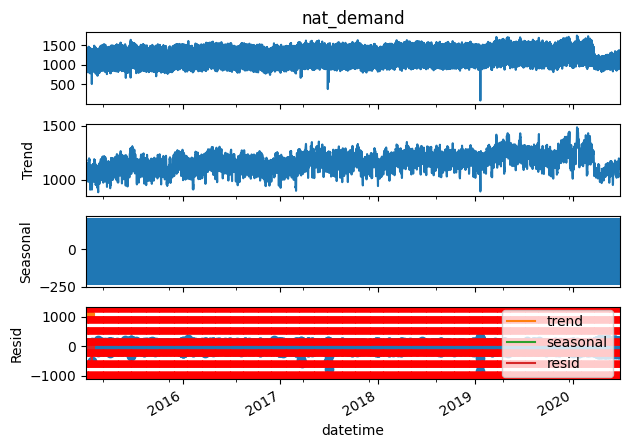

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['nat_demand'], model='additive')
result.plot();
n_days = 30
n = 24 * n_days
result.trend[:n].plot(legend=True);

result.seasonal[:n].plot(legend=True);

result.resid[:n].plot(legend=True);

min_date, max_date = df.index.min(), df.index.max()
current_date = min_date

while current_date <= max_date:
    if current_date.weekday() == 4:  # Monday is considered the start of the week
        plt.axvline(x=current_date, color='red', linestyle='--')
    current_date += pd.Timedelta(days=1)

<Axes: xlabel='datetime'>

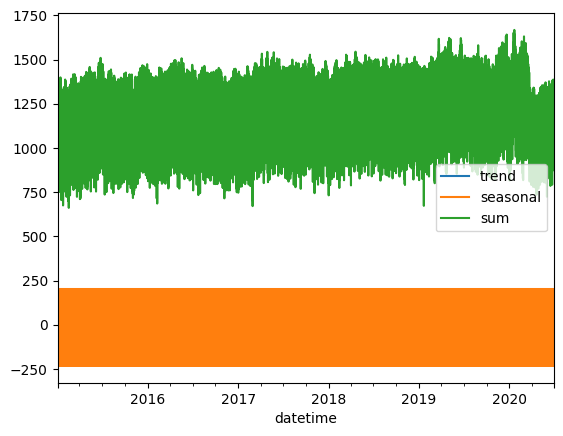

In [ ]:
decomp_data = {}
decomp_data['trend'] = result.trend
decomp_data['seasonal'] = result.seasonal
df_decom_data = pd.DataFrame(decomp_data)
df_decom_data['sum'] = df_decom_data['trend'] + df_decom_data['seasonal']
df_decom_data.plot()